# Lenet,Lenet-5の概要
## Lenet
Lenetは1988年のYann le Cunの論文「Generalization and Network Design Strategies」で紹介されたCNNである. このCNNのタスクは16x16ピクセルの手書き数字認識で, 訓練セットは320枚, テストセットは160枚である. 画像の例は下の通りである(論文から引用).

![Lenet-pattern-example](./Lenet-pattern-example.png) 

Lenetのモデルは次の通りである. Lenetは3層のCNNである. 特徴は現在ではactivationはReLUが主流であるがtanhを用いていること, プーリングを行わないことである. また出力層でsoftmax関数を用いていない. さらに損失関数がCategorical cross entropyではなく,MSEである. 画像データがないため実装は行わないが論文での精度は98.4%であった.

- input(16,16)
- Layer1
    - input(16,16)
    - filter 2
    - filter size(3,3)
    - stride 2
    - activation tanh
    - output(8,8,2)
- Layer2
    - input(8,8,2)
    - filter 4
    - filter size(5,5)
    - stride 1
    - activation tanh
    - output(4,4,4)
- Flatten
    - input(4,4,4)
    - output(16)
    
- Dense
    - input(16)
    - activation tanh
    - output(10)

## Lenet-5
Lenet-5は1998年のYann le Cunの論文「Gradient-Based learning applied to document recognition」で紹介されたCNNである. この論文のターゲットは, 文字列の画像を文字列として出力するCNNであった. Lenet-5は32x32ピクセルの手書き文字認識である. 
Lenet-5のモデルは次の通りである. 特徴としてプーリング後にtanhを挟んでいること, Layer3からLayer4で畳み込みを行うチャンネルがそれぞれ異なること(対称性の破壊)が挙げられる. またEuclidean Radial Based Functionは0(ゼロ),O(オー)を代表とする似ている文字には罰則を小さくするという工夫である.

- input(32,32)
- Layer1
    - input(32,32)
    - filter 6
    - filter size (5,5)
    - stride 1
    - activation tanh
    - output(28,28,6)
- Layer2
    - input(28,28,6)
    - filter 6
    - filter size (2,2)
    - stride 1
    - activation tanh
- Average Pooling
    - window size(2,2)
    - stride(2,2)
    - activation tanh(実装しない)
    - output(14,14,6)
- Layer3
    - input(14,14,6)
    - filter 16
    - filter size (5,5)
    - stride 1
    - activation tanh    
- Average Pooling
    - window size(2,2)
    - stride(2,2)
    - activation tanh(実装しない)
    - output(5,5,16)
- Layer4
    - input(5,5,6)
    - filter 120
    - filter size (5,5)
    - stride 1
    - activation tanh
    - output(1,1,120)
- Flatten
    - input(1,1,120)
    - output(120)
- Dense
    - input(120)
    - activation tanh
    - output(84)
- Dense
    - input(84)
    - activation softmax (原論文ではEuclidean Radial Based Function)
    - output(10)
 
 Reference:
 【深層学習】CNN紹介 "LeNet" 1990年代に活躍したCNN【ディープラーニングの世界 vol. 13 】 #076 #VRアカデミア #DeepLearning  
 AIcia Solid Project  
 https://youtu.be/-tWolA2WvFI  
  
 Generalization and Network Design Strategies  
 http://yann.lecun.com/exdb/publis/pdf/lecun-89.pdf
 
 Gradient-Based learning applied to document recognition  
 http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf

# Lenet-5の実装
ここではMNISTデータを用いてLenet-5を実装する. MNISTは28x28の画像であるため入力層の形状が異なるが, パディングによって調整する.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load mnist
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

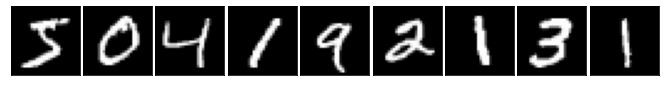

In [3]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [4]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [1]:
import keras
from tensorflow.keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

model = Sequential()
# Layer1,2
# (28,28,1)->(14,14,6)
model.add(Conv2D(6, kernel_size=(5, 5), activation="tanh",padding="same",input_shape=(28, 28, 1)))
model.add(AveragePooling2D((2, 2), strides=(2, 2))) # Average Pooling
# Layer3
# (14,14,6)->(5,5,16)
model.add(Conv2D(16, kernel_size=(5, 5),strides=(1,1),activation="tanh",padding="valid"))
model.add(AveragePooling2D((2, 2), strides=(2, 2))) # Average Pooling
# Layer4
# (5,5,16)->(1,1,120)
model.add(Conv2D(120, kernel_size=(5, 5),strides=(1,1),activation="tanh",padding="valid"))
# Flatten
model.add(Flatten())
# Dense
model.add(Dense(84,activation="tanh"))
# Dense
model.add(Dense(10,activation="softmax"))
model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer="adam",
    metrics=["accuracy"]
)

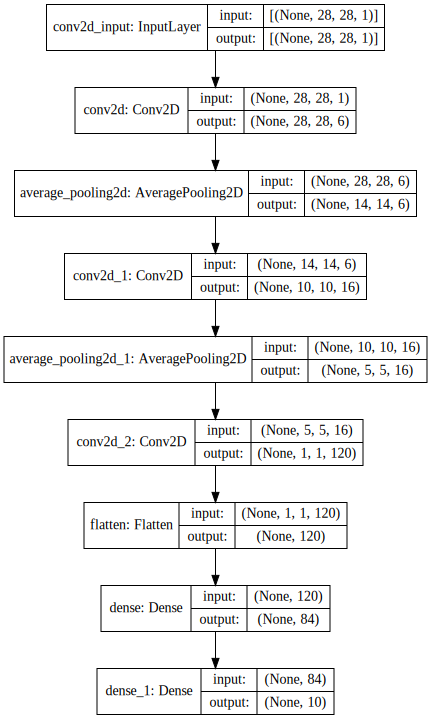

In [2]:
SVG(model_to_dot(model, show_shapes=True, dpi=None).create(prog='dot', format='svg'))

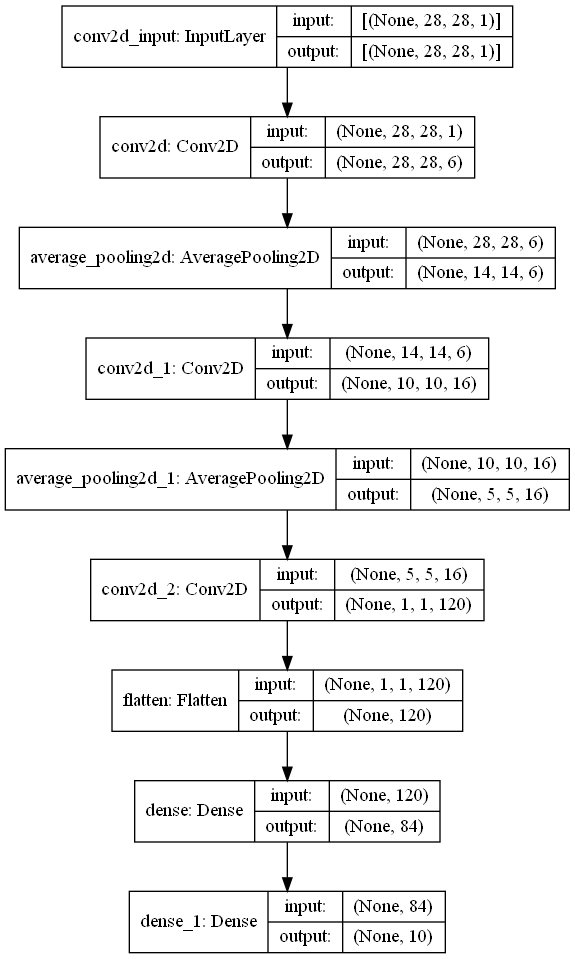

In [3]:
# モデルを画像として出力
from keras.utils import plot_model
plot_model(model,show_shapes=True,to_file='Lenet.png')

In [7]:
history = model.fit(x_train, y_train, batch_size=32, verbose=1, epochs=20,validation_split = 0.2)

Epoch 1/20
1500/1500 [==============================] - 13s 4ms/step - loss: 0.4435 - accuracy: 0.8695 - val_loss: 0.1179 - val_accuracy: 0.9652
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.0846 - val_accuracy: 0.9733
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0674 - accuracy: 0.9796 - val_loss: 0.0705 - val_accuracy: 0.9789
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.0711 - val_accuracy: 0.9798
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0382 - accuracy: 0.9881 - val_loss: 0.0591 - val_accuracy: 0.9829
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0614 - val_accuracy: 0.9834
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0676 - val_accuracy

In [8]:
def plot_loss(history):
    """エポックごとの損失関数をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    # 損失関数の履歴を取得
    loss_train = history.history["loss"]
    loss_val = history.history["val_loss"]

    # 損失関数をプロット
    epochs=range(1,len(history.history["loss"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs,loss_train,label="Training loss")
    plt.plot(epochs,loss_val,label="Validation loss")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

In [9]:
def plot_acc(history):
    """エポックごとの正解率をプロットする関数
    
    Args:
    history : fittingの履歴
    
    Returns:
    None
    """
    acc_train = history.history['accuracy']
    acc_val = history.history['val_accuracy']
    epochs = range(1,len(history.history["accuracy"])+1)
    plt.figure(facecolor="white")
    plt.plot(epochs, acc_train, 'g', label='Training accuracy')
    plt.plot(epochs, acc_val, 'b', label='Validation accuracy')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

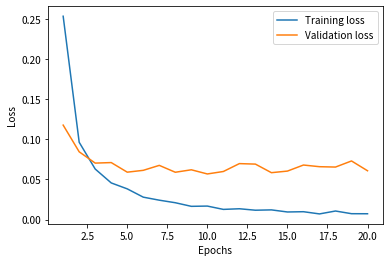

In [10]:
# 損失関数の描画
plot_loss(history)

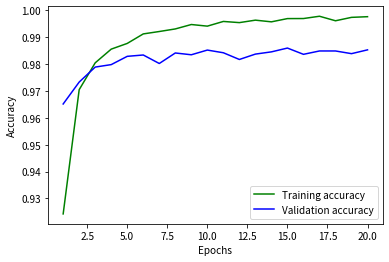

In [11]:
# 正解率を描画
plot_acc(history)

In [12]:
# modelの評価
scores = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9877
